In [1]:
import requests
from bs4 import BeautifulSoup
import re

In [2]:
url_request = "https://cuantoestaeldolar.pe/"
llamada = requests.get(url_request)

In [3]:
llamada.status_code

200

In [140]:
llamada.text

'<!DOCTYPE html><html><head><meta name="viewport" content="width=device-width" /><meta charSet="utf-8" /><link rel="apple-touch-icon" sizes="57x57" href="/img/apple-touch-icon-57x57.png" /><link rel="apple-touch-icon" sizes="76x76" href="/img/apple-touch-icon-76x76.png" /><link rel="apple-touch-icon" sizes="120x120" href="/img/apple-touch-icon-120x120.png" /><link rel="apple-touch-icon" sizes="144x144" href="/img/apple-touch-icon-144x144.png" /><link rel="apple-touch-icon" sizes="152x152" href="/img/apple-touch-icon-152x152.png" /><link rel="apple-touch-icon" sizes="180x180" href="/img/apple-touch-icon-180x180.png" /><link rel="canonical" href="https://cuantoestaeldolar.pe/" /><link rel="amphtml" href="https://amp.cuantoestaeldolar.pe/" /><script id="organization" type="application/ld+json">{"@context":"http://schema.org","@type":"Organization","name":"cuantoestaeldolar.pe","url":"https://cuantoestaeldolar.pe","sameAs":["https://twitter.com/cuantoestadolar","https://www.youtube.com/cha

In [4]:
datos_soup = BeautifulSoup(llamada.text, 'html.parser')

In [5]:
datos_soup

<!DOCTYPE html>
<html><head><meta content="width=device-width" name="viewport"/><meta charset="utf-8"/><link href="/img/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/img/apple-touch-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/><link href="/img/apple-touch-icon-120x120.png" rel="apple-touch-icon" sizes="120x120"/><link href="/img/apple-touch-icon-144x144.png" rel="apple-touch-icon" sizes="144x144"/><link href="/img/apple-touch-icon-152x152.png" rel="apple-touch-icon" sizes="152x152"/><link href="/img/apple-touch-icon-180x180.png" rel="apple-touch-icon" sizes="180x180"/><link href="https://cuantoestaeldolar.pe/" rel="canonical"/><link href="https://amp.cuantoestaeldolar.pe/" rel="amphtml"/><script id="organization" type="application/ld+json">{"@context":"http://schema.org","@type":"Organization","name":"cuantoestaeldolar.pe","url":"https://cuantoestaeldolar.pe","sameAs":["https://twitter.com/cuantoestadolar","https://www.youtube.com/channel/UCjkq

In [25]:
precios = datos_soup.find_all("p",class_="ValueQuotation_text___mR_0")

In [ ]:
for precio in precios:
    print(precio.get_text().strip())

In [48]:
precios[0].get_text().strip()

'3.779'

In [6]:
#prices = datos_soup.find_all('div', attrs={'class': re.compile('hidden md:block')})
prices = datos_soup.find_all('div', attrs={'class': re.compile('^.*flex align-middle py-2 justify-between.*')})

In [7]:
prices[0]

<div class="flex align-middle py-2 justify-between"><div class="w-[90px] md:w-36 h-auto flex align-middle justify-center"><span style="box-sizing:border-box;display:inline-block;overflow:hidden;width:128px;height:40px;background:none;opacity:1;border:0;margin:0;padding:0;position:relative"><noscript><img data-nimg="fixed" decoding="async" loading="lazy" src="/img/logo/western-union.svg" srcset="/img/logo/western-union.svg 1x, /img/logo/western-union.svg 2x" style="position:absolute;top:0;left:0;bottom:0;right:0;box-sizing:border-box;padding:0;border:none;margin:auto;display:block;width:0;height:0;min-width:100%;max-width:100%;min-height:100%;max-height:100%"/></noscript></span></div><div class="my-auto"><button class="mx-2 md:mx-4"><span class="icon icon-arrow rotate-180"></span></button></div><div class="flex my-auto"><a href="https://westernunionperu.pe/cambiodemoneda?utm_source=ced&amp;utm_content=listado" rel="noreferrer nofollow" target="_blank"><div class="hover:shadow-lg capital

In [8]:
prices[0].find('a', href=True)['href'].split("//")[1].split(".")[0]


'westernunionperu'

In [ ]:
for price in prices:
    broker = price.find("a", href=True)['href']
    print(broker)
    precio_compra = price.findAll("p")[7].text
    print(precio_compra)

In [10]:
import pandas as pd
# create an Empty DataFrame object
df = pd.DataFrame() 
print(df)

Empty DataFrame
Columns: []
Index: []


In [11]:
for item in prices:
    broker = item.find("a", href=True)['href'].split("//")[1].split(".")[0]
    #print(broker)
    precio_compra = item.findAll("p")[7].text
    #print(precio_compra)
    precio_venta = item.findAll("p")[9].text
    #print(precio_venta)
    df = df.append({"broker":broker,"buy":precio_compra,"sell":precio_venta}, ignore_index=True)

C:\Users\Enrique\AppData\Local\Temp\ipykernel_10384\3410501639.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"broker":broker,"buy":precio_compra,"sell":precio_venta}, ignore_index=True)
C:\Users\Enrique\AppData\Local\Temp\ipykernel_10384\3410501639.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"broker":broker,"buy":precio_compra,"sell":precio_venta}, ignore_index=True)
C:\Users\Enrique\AppData\Local\Temp\ipykernel_10384\3410501639.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"broker":broker,"buy":precio_compra,"sell":precio_venta}, ignore_index=True)
C:\Users\Enrique\AppData\Local\Temp\ipykernel_10384\3410501639.py:8: FutureWarning: The frame.append method i

In [12]:
len(df)

52

In [13]:
df

,broker,buy,sell
0,westernunionperu,3.755,3.780
1,cambix,3.750,3.775
2,dollarhouse,3.760,3.778
3,tucambista,3.761,3.777
4,cambiafx,3.760,3.775
5,instakash,3.760,3.776
6,cambiosol,3.765,3.780
7,www,3.765,3.771
8,perudolar,3.760,3.790
9,yanki,3.759,3.775


In [ ]:
#pip install -U matplotlib

Text(0.5, 1.0, 'Mi primer gráfico')

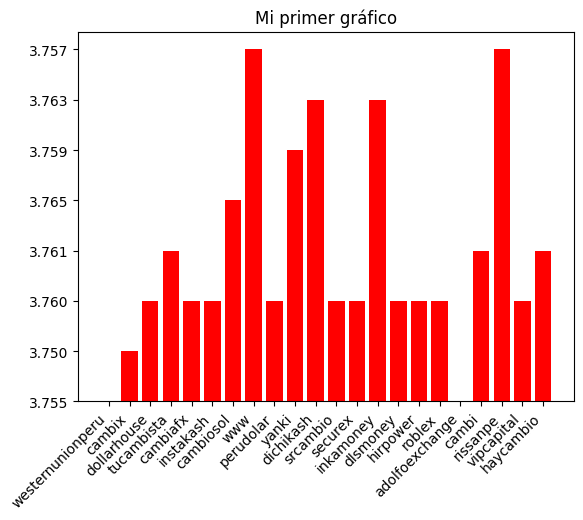

In [17]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots()

ax.bar(df["broker"], df["buy"], color="red") #scatter
fig.add_artist()
plt.xticks(rotation=45, ha='right')
plt.title("Mi primer gráfico")